In [ ]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Downloading, Extracting, Splitting the dataset and preprocessing it

##### Cats_and_Dogs_Dataset

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-23 16:10:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   115MB/s    in 0.6s    

2022-08-23 16:10:20 (115 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import shutil
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescaling all images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# creating the test dataset from the train data
test_dir = os.mkdir(os.path.join(base_dir, 'test'))
test_dir = os.path.join(base_dir, 'test')

test_cats_dir = os.mkdir(os.path.join(test_dir, 'cats'))
test_dogs_dir = os.mkdir(os.path.join(test_dir, 'dogs'))

test_dogs = os.path.join(test_dir, 'dogs')
test_cats = os.path.join(test_dir, 'cats')

In [ ]:
files_cat = os.listdir(train_cats_dir)
origin = train_cats_dir + "/"
i =1
for f in files_cat:
    if(i<=100):
      shutil.move(origin +f, test_cats)
      i = i+1

In [ ]:
files_dog = os.listdir(train_dogs_dir)
origin = train_dogs_dir + "/"
i =1
for f in files_dog:
    if(i<=100):
      shutil.move(origin +f, test_dogs)
      i = i+1

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1800 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size= 20,
    class_mode = 'categorical'
)

Found 200 images belonging to 2 classes.


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

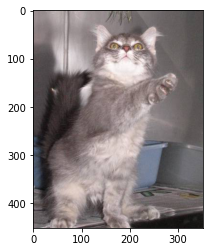

In [ ]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[10])))

##### Horse2Zebra dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Directly downloading the dataset from kaggle and using it
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anantsabharwal","key":"04a339978a82c96718ec581a3156f4b0"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d balraj98/horse2zebra-dataset

 85% 95.0M/111M [00:04<00:00, 27.3MB/s]
100% 111M/111M [00:04<00:00, 28.6MB/s] 


In [ ]:
local_zip1 = '/content/horse2zebra-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip1, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
! mkdir /tmp/horse2zebra
! mkdir /tmp/horse2zebra/train
! mkdir /tmp/horse2zebra/test
! mv /tmp/trainA /tmp/horse2zebra/train/
! mv /tmp/trainB /tmp/horse2zebra/train/
! mv /tmp/testA /tmp/horse2zebra/test/
! mv /tmp/testB /tmp/horse2zebra/test/

In [ ]:
base_dir_hz = '/tmp/horse2zebra'
train_dir_hz = os.path.join(base_dir_hz, 'train')
test_dir_hz = os.path.join(base_dir_hz, 'test')

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join(train_dir_hz, 'trainA')

# Directory with our training zebra pictures
train_zebra_dir = os.path.join(train_dir_hz, 'trainB')

# Directory with our testing horse pictures
test_horse_dir = os.path.join(test_dir_hz, 'testA')

# Directory with our testing zebra pictures
test_zebra_dir = os.path.join(test_dir_hz, 'testB')

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator_hz = train_datagen.flow_from_directory(
        train_dir_hz,  # source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
test_generator_hz = test_datagen.flow_from_directory(
        test_dir_hz,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [ ]:
train_horse_fnames = os.listdir(train_horse_dir)
train_zebra_fnames = os.listdir(train_zebra_dir)

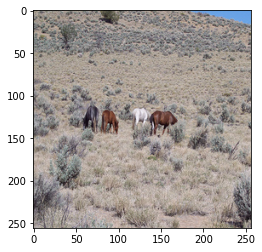

In [ ]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[10])))

#### Building various architectures

##### AlexNet architecture

###### Cats and Dogs

In [ ]:
model_AN_CnD = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2 , activation='softmax')
])

###### Horses and Zebras

In [ ]:
model_AN_H2Z = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2 , activation='softmax')
])

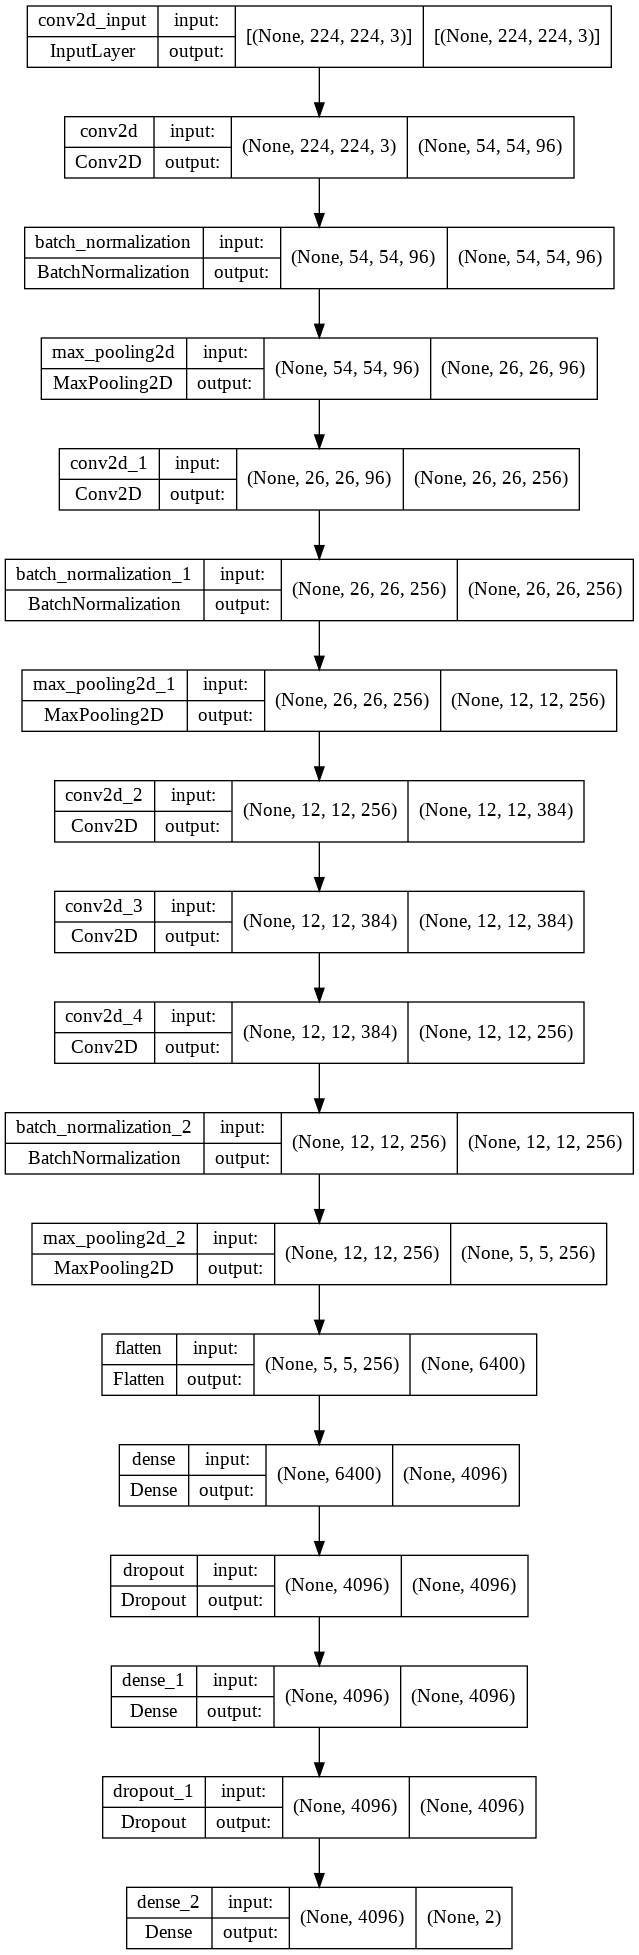

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_AN_CnD,  show_shapes=True, show_layer_names=True)

##### VGG-16

In [ ]:
from keras.applications.vgg16 import VGG16
base_model_vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_vgg.trainable = False #freeze the layers
base_model_vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

###### Cats and Dogs

In [ ]:
#adding layers to the above model
model_vgg_CnD = tf.keras.Sequential([
    base_model_vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_vgg_CnD.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


###### Horses and Zebras

In [ ]:
#adding layers to the above model
model_vgg_H2Z = tf.keras.Sequential([
    base_model_vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_vgg_H2Z.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


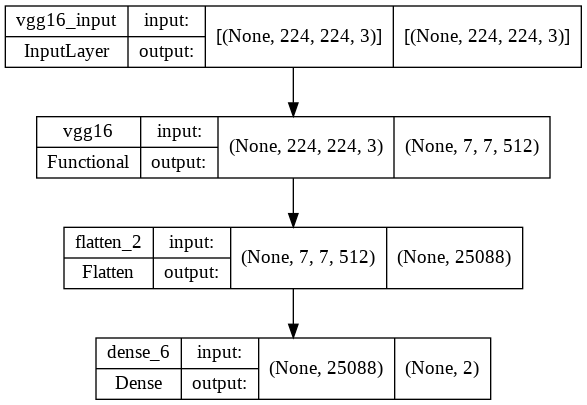

In [ ]:
plot_model(model_vgg_CnD,  show_shapes=True, show_layer_names=True)

##### GoogleNet

Inception v3 network which is the third edition of Google's Inception Convolution Neural Network

In [ ]:
from keras.applications.inception_v3 import InceptionV3
base_model_GN = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_GN.trainable = False #freeze the layers
base_model_GN.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 111, 111, 32  96         ['conv2d_10[0][0]']              
 rmalization)         

###### Cats and Dogs

In [ ]:
#adding layers to the above model
model_GN_CnD = tf.keras.Sequential([
    base_model_GN,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_GN_CnD.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_8 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


###### Horse and Zebras

In [ ]:
#adding layers to the above model
model_GN_H2Z = tf.keras.Sequential([
    base_model_GN,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_GN_H2Z.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_9 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


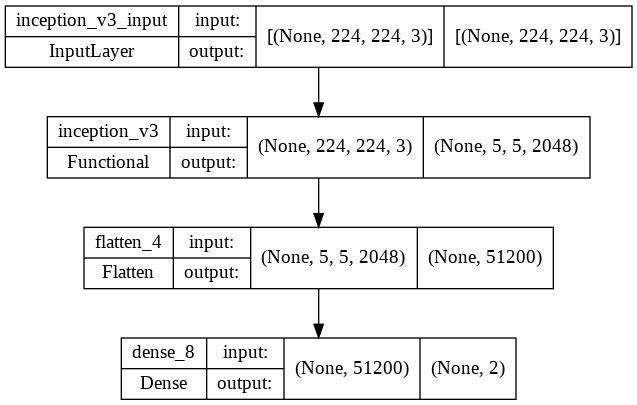

In [ ]:
plot_model(model_GN_CnD,  show_shapes=True, show_layer_names=True)

##### ResNet50

In [ ]:
base_model_RN = tf.keras.applications.ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_RN.trainable = False #freeze the layers
base_model_RN.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

###### Cats and Dogs

In [ ]:
model_RN_CnD = tf.keras.Sequential([
    base_model_RN,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_RN_CnD.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_10 (Dense)            (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


###### Horses and Zebras

In [ ]:
model_RN_H2Z = tf.keras.Sequential([
    base_model_RN,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_RN_H2Z.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 100352)            0         
                                                                 
 dense_11 (Dense)            (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


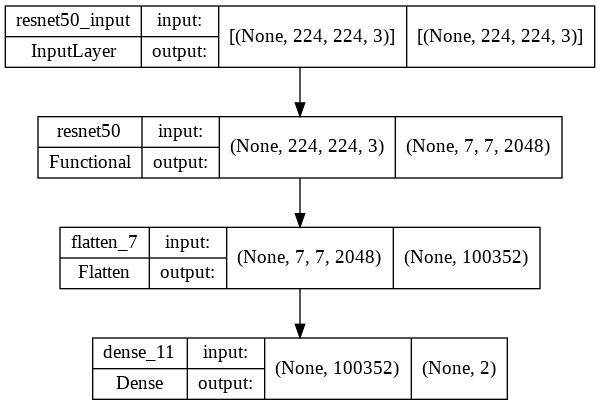

In [ ]:
plot_model(model_RN_H2Z,  show_shapes=True, show_layer_names=True)

##### EfficientNetB0

In [ ]:
base_model_EN = tf.keras.applications.EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_EN.trainable = False #freeze the layers
base_model_EN.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

###### Cats and Dogs

In [ ]:
model_EN_CnD = tf.keras.Sequential([
    base_model_EN,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_EN_CnD.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_8 (Flatten)         (None, 62720)             0         
                                                                 
 dense_12 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


###### Horses and Zebras

In [ ]:
model_EN_H2Z = tf.keras.Sequential([
    base_model_EN,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_EN_H2Z.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_9 (Flatten)         (None, 62720)             0         
                                                                 
 dense_13 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


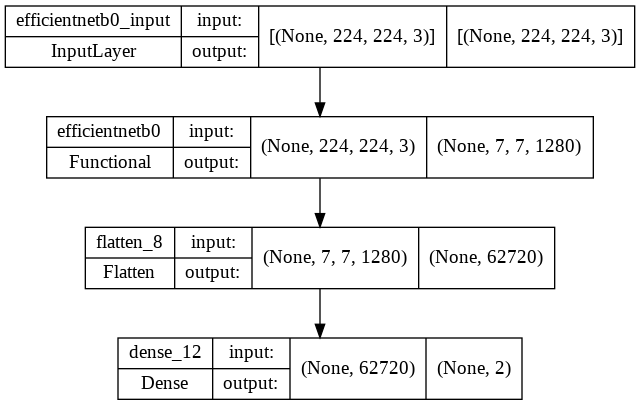

In [ ]:
plot_model(model_EN_CnD,  show_shapes=True, show_layer_names=True)

##### MobileNetV2

In [ ]:
base_model_MN = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_MN.trainable = False #freeze the layers
base_model_MN.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

###### Cats and Dogs

In [ ]:
model_MN_CnD = tf.keras.Sequential([
    base_model_MN,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_MN_CnD.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dense_14 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


###### Horses and Zebras

In [ ]:
model_MN_H2Z = tf.keras.Sequential([
    base_model_MN,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_MN_H2Z.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_11 (Flatten)        (None, 62720)             0         
                                                                 
 dense_15 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


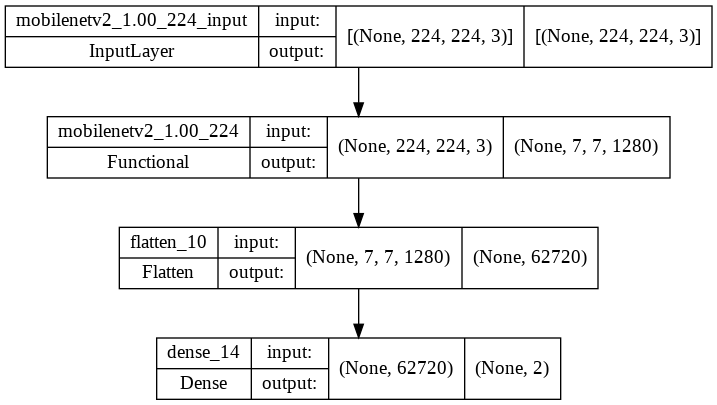

In [ ]:
plot_model(model_MN_CnD,  show_shapes=True, show_layer_names=True)

#### Compiling all the models

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

In [ ]:
result_list=[]
model_list=[]

##### Compiling all the models for Cats and Dogs Dataset

In [ ]:
model_AN_CnD.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_AN_CnD = model_AN_CnD.fit(train_generator,steps_per_epoch=90,  # 1800 images = batch_size * steps
      epochs=6,validation_data=validation_generator,validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1,callbacks=callback)

Epoch 1/6
90/90 [==============================] - 22s 111ms/step - loss: 1.9775 - acc: 0.5689 - val_loss: 0.7500 - val_acc: 0.5000
Epoch 2/6
90/90 [==============================] - 9s 104ms/step - loss: 1.6551 - acc: 0.5872 - val_loss: 1.4948 - val_acc: 0.5000
Epoch 3/6
90/90 [==============================] - 9s 105ms/step - loss: 1.1594 - acc: 0.5928 - val_loss: 1.3928 - val_acc: 0.5000
Epoch 4/6
90/90 [==============================] - 9s 105ms/step - loss: 0.8359 - acc: 0.6422 - val_loss: 0.9415 - val_acc: 0.5250
Epoch 5/6
90/90 [==============================] - 9s 105ms/step - loss: 0.7719 - acc: 0.6594 - val_loss: 1.4346 - val_acc: 0.5260
Epoch 6/6
90/90 [==============================] - 10s 106ms/step - loss: 0.7220 - acc: 0.6872 - val_loss: 1.3170 - val_acc: 0.5370


In [ ]:
model_vgg_CnD.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_VGG_CnD = model_vgg_CnD.fit(train_generator,steps_per_epoch=90,  
      epochs=6,validation_data=validation_generator,validation_steps=50,  
      verbose=1,callbacks=callback)

Epoch 1/6
90/90 [==============================] - 20s 194ms/step - loss: 0.4913 - acc: 0.7544 - val_loss: 0.3686 - val_acc: 0.8430
Epoch 2/6
90/90 [==============================] - 18s 196ms/step - loss: 0.2893 - acc: 0.8994 - val_loss: 0.2862 - val_acc: 0.8840
Epoch 3/6
90/90 [==============================] - 18s 196ms/step - loss: 0.2257 - acc: 0.9256 - val_loss: 0.2596 - val_acc: 0.9060
Epoch 4/6
90/90 [==============================] - 17s 192ms/step - loss: 0.1890 - acc: 0.9444 - val_loss: 0.2403 - val_acc: 0.9020
Epoch 5/6
90/90 [==============================] - 17s 191ms/step - loss: 0.1643 - acc: 0.9578 - val_loss: 0.2316 - val_acc: 0.9010
Epoch 6/6
90/90 [==============================] - 17s 191ms/step - loss: 0.1490 - acc: 0.9572 - val_loss: 0.2269 - val_acc: 0.9010


In [ ]:
model_GN_CnD.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_GN_CnD = model_GN_CnD.fit(train_generator,steps_per_epoch=90, 
      epochs=6,validation_data=validation_generator,validation_steps=50,  
      verbose=1,callbacks=callback)

Epoch 1/6
90/90 [==============================] - 16s 130ms/step - loss: 0.1164 - acc: 0.9561 - val_loss: 0.0672 - val_acc: 0.9810
Epoch 2/6
90/90 [==============================] - 11s 117ms/step - loss: 0.0109 - acc: 0.9972 - val_loss: 0.0623 - val_acc: 0.9820
Epoch 3/6
90/90 [==============================] - 11s 119ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0500 - val_acc: 0.9850
Epoch 4/6
90/90 [==============================] - 11s 117ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0488 - val_acc: 0.9820
Epoch 5/6
90/90 [==============================] - 10s 116ms/step - loss: 8.1823e-04 - acc: 1.0000 - val_loss: 0.0464 - val_acc: 0.9840
Epoch 6/6
90/90 [==============================] - 10s 116ms/step - loss: 6.4754e-04 - acc: 1.0000 - val_loss: 0.0470 - val_acc: 0.9840


In [ ]:
model_RN_CnD.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_RN_CnD = model_RN_CnD.fit(train_generator,steps_per_epoch=90,  
      epochs=6,validation_data=validation_generator,validation_steps=50,  
      verbose=1,callbacks=callback)

Epoch 1/6
90/90 [==============================] - 17s 149ms/step - loss: 0.6968 - acc: 0.5622 - val_loss: 0.6484 - val_acc: 0.6250
Epoch 2/6
90/90 [==============================] - 12s 129ms/step - loss: 0.6456 - acc: 0.6256 - val_loss: 0.6403 - val_acc: 0.6180
Epoch 3/6
90/90 [==============================] - 12s 130ms/step - loss: 0.6325 - acc: 0.6411 - val_loss: 0.8147 - val_acc: 0.5450
Epoch 4/6
90/90 [==============================] - 13s 140ms/step - loss: 0.6261 - acc: 0.6467 - val_loss: 0.7372 - val_acc: 0.5450
Epoch 5/6
90/90 [==============================] - 12s 129ms/step - loss: 0.6066 - acc: 0.6661 - val_loss: 0.6095 - val_acc: 0.6670
Epoch 6/6
90/90 [==============================] - 12s 129ms/step - loss: 0.5766 - acc: 0.6989 - val_loss: 0.6221 - val_acc: 0.6580


In [ ]:
model_EN_CnD.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_EN_CnD = model_EN_CnD.fit(train_generator,steps_per_epoch=90,  
      epochs=6,validation_data=validation_generator,validation_steps=50,  
      verbose=1,callbacks=callback)

Epoch 1/6
90/90 [==============================] - 18s 128ms/step - loss: 0.7685 - acc: 0.4972 - val_loss: 0.7337 - val_acc: 0.5000
Epoch 2/6
90/90 [==============================] - 10s 113ms/step - loss: 0.7279 - acc: 0.5117 - val_loss: 0.7985 - val_acc: 0.5000
Epoch 3/6
90/90 [==============================] - 10s 113ms/step - loss: 0.7522 - acc: 0.4994 - val_loss: 0.7181 - val_acc: 0.5000
Epoch 4/6
90/90 [==============================] - 10s 114ms/step - loss: 0.7267 - acc: 0.4839 - val_loss: 0.7082 - val_acc: 0.5000
Epoch 5/6
90/90 [==============================] - 10s 113ms/step - loss: 0.7330 - acc: 0.5100 - val_loss: 0.7859 - val_acc: 0.5000
Epoch 6/6
90/90 [==============================] - 10s 114ms/step - loss: 0.7158 - acc: 0.5111 - val_loss: 0.7105 - val_acc: 0.5000


In [ ]:
model_MN_CnD.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_MN_CnD = model_MN_CnD.fit(train_generator,steps_per_epoch=90,  
      epochs=6,validation_data=validation_generator,validation_steps=50,  
      verbose=1,callbacks=callback)

Epoch 1/6
90/90 [==============================] - 13s 116ms/step - loss: 0.1487 - acc: 0.9483 - val_loss: 0.0577 - val_acc: 0.9800
Epoch 2/6
90/90 [==============================] - 10s 110ms/step - loss: 0.0104 - acc: 0.9978 - val_loss: 0.0603 - val_acc: 0.9800
Epoch 3/6
90/90 [==============================] - 11s 121ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0587 - val_acc: 0.9780
Epoch 4/6
90/90 [==============================] - 10s 110ms/step - loss: 7.8627e-04 - acc: 1.0000 - val_loss: 0.0590 - val_acc: 0.9780
Epoch 5/6
90/90 [==============================] - 10s 108ms/step - loss: 6.0621e-04 - acc: 1.0000 - val_loss: 0.0592 - val_acc: 0.9790
Epoch 6/6
90/90 [==============================] - 11s 121ms/step - loss: 4.8067e-04 - acc: 1.0000 - val_loss: 0.0599 - val_acc: 0.9790


##### Compiling all the models for Horse2Zebra dataste

In [ ]:
model_AN_H2Z.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_AN_H2Z = model_AN_H2Z.fit(train_generator_hz,steps_per_epoch=100,  
      epochs=2,verbose=1,callbacks=callback)

Epoch 1/2
100/100 [==============================] - 7s 61ms/step - loss: 0.9636 - acc: 0.7824
Epoch 2/2
100/100 [==============================] - 6s 59ms/step - loss: 0.6352 - acc: 0.8425


In [ ]:
model_vgg_H2Z.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_VGG_H2Z = model_vgg_H2Z.fit(train_generator_hz,steps_per_epoch=100,  
      epochs=2,verbose=1,callbacks=callback)

Epoch 1/2
100/100 [==============================] - 14s 131ms/step - loss: 0.3101 - acc: 0.8753
Epoch 2/2
100/100 [==============================] - 14s 135ms/step - loss: 0.1667 - acc: 0.9435


In [ ]:
model_GN_H2Z.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_GN_H2Z = model_GN_H2Z.fit(train_generator_hz,steps_per_epoch=100, 
      epochs=2,verbose=1,callbacks=callback)

Epoch 1/2
100/100 [==============================] - 11s 73ms/step - loss: 0.1032 - acc: 0.9626
Epoch 2/2
100/100 [==============================] - 7s 66ms/step - loss: 0.0232 - acc: 0.9944


In [ ]:
model_RN_H2Z.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_RN_H2Z = model_RN_H2Z.fit(train_generator_hz,steps_per_epoch=100,  
      epochs=2,verbose=1,callbacks=callback)

Epoch 1/2
100/100 [==============================] - 11s 86ms/step - loss: 0.5418 - acc: 0.7052
Epoch 2/2
100/100 [==============================] - 8s 77ms/step - loss: 0.4174 - acc: 0.8067


In [ ]:
model_EN_H2Z.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_EN_H2Z = model_EN_H2Z.fit(train_generator_hz,steps_per_epoch=100,  
      epochs=2,verbose=1,callbacks=callback)

Epoch 1/2
100/100 [==============================] - 12s 66ms/step - loss: 0.7417 - acc: 0.5230
Epoch 2/2
100/100 [==============================] - 6s 64ms/step - loss: 0.7288 - acc: 0.5285


In [ ]:
model_MN_H2Z.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history_MN_H2Z = model_MN_H2Z.fit(train_generator_hz,steps_per_epoch=100,  
      epochs=2,verbose=1,callbacks=callback)

Epoch 1/2
100/100 [==============================] - 8s 59ms/step - loss: 0.0985 - acc: 0.9685
Epoch 2/2
100/100 [==============================] - 6s 59ms/step - loss: 0.0042 - acc: 0.9980


#### Testing the models

##### Cats and Dogs 

In [ ]:
model_list.append("Model_AN,CnD")
result_list.append(model_AN_CnD.evaluate(test_generator))

10/10 [==============================] - 1s 66ms/step - loss: 1.2729 - acc: 0.5400


In [ ]:
model_list.append("Model_vgg,CnD")
result_list.append(model_vgg_CnD.evaluate(test_generator))

10/10 [==============================] - 1s 126ms/step - loss: 0.2203 - acc: 0.9050


In [ ]:
model_list.append("Model_GN,CnD")
result_list.append(model_GN_CnD.evaluate(test_generator))

10/10 [==============================] - 1s 77ms/step - loss: 0.0253 - acc: 0.9900


In [ ]:
model_list.append("Model_RN,CnD")
result_list.append(model_RN_CnD.evaluate(test_generator))

10/10 [==============================] - 1s 84ms/step - loss: 0.5971 - acc: 0.7000


In [ ]:
model_list.append("Model_EN,CnD")
result_list.append(model_EN_CnD.evaluate(test_generator))

10/10 [==============================] - 1s 75ms/step - loss: 0.7103 - acc: 0.5000


In [ ]:
model_list.append("Model_MN,CnD")
result_list.append(model_MN_CnD.evaluate(test_generator))

10/10 [==============================] - 1s 75ms/step - loss: 0.0347 - acc: 0.9900


##### Horse2Zebra

In [ ]:
model_list.append("Model_AN,H2Z")
result_list.append(model_AN_H2Z.evaluate(test_generator_hz))

13/13 [==============================] - 1s 56ms/step - loss: 2.2550 - acc: 0.4615


In [ ]:
model_list.append("Model_vgg,H2Z")
result_list.append(model_vgg_H2Z.evaluate(test_generator_hz))

13/13 [==============================] - 2s 127ms/step - loss: 0.1448 - acc: 0.9538


In [ ]:
model_list.append("Model_GN,H2Z")
result_list.append(model_GN_H2Z.evaluate(test_generator_hz))

13/13 [==============================] - 3s 66ms/step - loss: 0.0536 - acc: 0.9846


In [ ]:
model_list.append("Model_RN,H2Z")
result_list.append(model_RN_H2Z.evaluate(test_generator_hz))

13/13 [==============================] - 2s 77ms/step - loss: 0.4071 - acc: 0.8154


In [ ]:
model_list.append("Model_EN,H2Z")
result_list.append(model_EN_H2Z.evaluate(test_generator_hz))

13/13 [==============================] - 2s 64ms/step - loss: 0.6856 - acc: 0.5385


In [ ]:
model_list.append("Modell_MN,H2Z")
result_list.append(model_MN_H2Z.evaluate(test_generator_hz))

13/13 [==============================] - 2s 60ms/step - loss: 0.0654 - acc: 0.9808


In [ ]:
df_m = pd.DataFrame(model_list,columns = ["Models"])
df_r = pd.DataFrame(result_list,columns = ["loss","accuracy"])
df = pd.concat([df_m, df_r], axis=1)
df

,Models,loss,accuracy
0,"Model_AN,CnD",1.272901,0.540000
1,"Model_vgg,CnD",0.220288,0.905000
2,"Model_GN,CnD",0.025296,0.990000
3,"Model_RN,CnD",0.597115,0.700000
4,"Model_EN,CnD",0.710314,0.500000
5,"Model_MN,CnD",0.034697,0.990000
6,"Model_AN,H2Z",2.254982,0.461538
7,"Model_vgg,H2Z",0.144823,0.953846
8,"Model_GN,H2Z",0.053621,0.984615
9,"Model_RN,H2Z",0.407063,0.815385
